In [15]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append('../')

# Graph imports
import src.graph as graph
import src.logit_estimator as estimator
import src.utils as utils

# usual imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import gc
import random
import networkx as nx

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



#np.random.seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Multiple times

In [16]:
n_runs = 10

n = 1000
d = 0
sigma = -4
warm_up = 100
max_iterations = 100

pathfolder = f'runs/est_sigma_d_multiple{abs(sigma)}'

# Create the directory if it does not exist
if not os.path.exists(pathfolder):
    os.makedirs(pathfolder)

In [17]:
import pickle

params_list = []
result_list = []

for i in range(n_runs):
    graph_model = graph.GraphModel(n=n, d=d, sigma=sigma)
    graphs, spec = graph_model.populate_edges_baseline( warm_up = warm_up, max_iterations = max_iterations, patience = 10, threshold = 5)
    g = graphs[-1]
    import gc
    del graphs
    gc.collect()

    est = estimator.LogitRegEstimator(g, d=d)

    features, labels = est.get_features_labels()
    result, params, pvalue = est.estimate_parameters(l1_wt=1, alpha=0, features=features, labels=labels)

    params_list.append(params)
    result_list.append(result)

    with open(f'{pathfolder}/results_array_{i}.pkl', 'wb') as f:
        pickle.dump(result_list, f)


iteration: 0
<class 'networkx.classes.graph.Graph'>
iteration: 1
<class 'networkx.classes.graph.Graph'>
iteration: 2
<class 'networkx.classes.graph.Graph'>
iteration: 3
<class 'networkx.classes.graph.Graph'>
iteration: 4
<class 'networkx.classes.graph.Graph'>
iteration: 5
<class 'networkx.classes.graph.Graph'>
iteration: 6
<class 'networkx.classes.graph.Graph'>
iteration: 7
<class 'networkx.classes.graph.Graph'>
iteration: 8
<class 'networkx.classes.graph.Graph'>
iteration: 9
<class 'networkx.classes.graph.Graph'>
iteration: 10
<class 'networkx.classes.graph.Graph'>
iteration: 11
<class 'networkx.classes.graph.Graph'>
iteration: 12
<class 'networkx.classes.graph.Graph'>
iteration: 13
<class 'networkx.classes.graph.Graph'>
iteration: 14
<class 'networkx.classes.graph.Graph'>
iteration: 15
<class 'networkx.classes.graph.Graph'>
iteration: 16
<class 'networkx.classes.graph.Graph'>
iteration: 17
<class 'networkx.classes.graph.Graph'>
iteration: 18
<class 'networkx.classes.graph.Graph'>
ite

LinAlgError: Singular matrix

# analysis

In [11]:

summary = result_list[0].summary2()
summary.tables[1].loc['const']

Coef.         -61.444784
Std.Err.    18652.445687
z              -0.003294
P>|z|           0.997372
[0.025     -36619.566554
0.975]      36496.676986
Name: const, dtype: float64

-61.444783842583526
-41.632980878087416
-43.02172106930332
-59.64311076999707
-40.18506567830935
-41.446386275655314
-66.91464032850457
-64.00469001720094
-41.13034007150594
-40.477474035897764


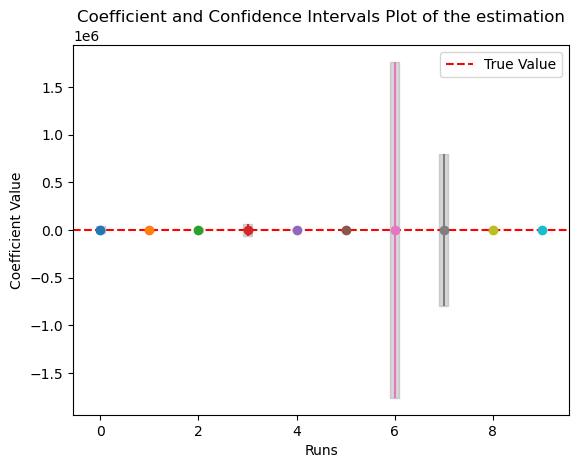

In [13]:
import matplotlib.pyplot as plt

# Assume results_array is your list of Pandas Series
fig, ax = plt.subplots()
for i, summary in enumerate(result_list):
    result = summary.summary2().tables[1].loc['const']
    coef = result.loc['Coef.']
    lower_bound = result.loc['[0.025']
    upper_bound = result.loc['0.975]']
    print(coef)
    ax.errorbar(i, coef, yerr=[[coef - lower_bound], [upper_bound - coef]], fmt='o')
    ax.fill_between([i-0.1, i+0.1], lower_bound, upper_bound, color='gray', alpha=0.3)

ax.axhline(y=-sigma, color='r', linestyle='--', label='True Value')
ax.set_xlabel('Runs')
ax.set_ylabel('Coefficient Value')
ax.set_title('Coefficient and Confidence Intervals Plot of the estimation')
ax.legend()

# Show plot
plt.show()
